In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import base64
import copy
import operator
import pickle
import random

import matplotlib
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import scipy
import torch
import torch.nn as nn
import torch.nn.functional as F
from kaggle_environments import evaluate, make, utils
from networkx.drawing.nx_pydot import graphviz_layout
from torch.nn import Conv2d
from torchvision.models.resnet import BasicBlock

from nets.basic import ConnNet

Loading environment lux_ai_s2 failed: No module named 'vec_noise'


/home/polzovatel/projects/kaggle/connectx/venv/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [107]:
from nets.basic import ConnNet 
from decider.mcts import MCTS
from decider.player import PlayRandomized
from train.trainer import Trainer

In [102]:
net = ConnNet(cols=3,rows=3) 
env = make("connectx", debug=True, configuration={'rows':net.rows,'columns': net.cols,'inarow':2})
mcts = MCTS(net, env)

for i in range(3):
    mcts.playout()

In [106]:


net = ConnNet(cols=3,rows=3)      
pl = PlayRandomized(25,net)
rs = pl.play()

/tmp/ipykernel_89115/560428309.py:26: DeprecationWarning: nx.nx_pydot.graphviz_layout depends on the pydot package, which hasknown issues and is not actively maintained. Consider usingnx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723
  pos = graphviz_layout(G, prog="twopi")


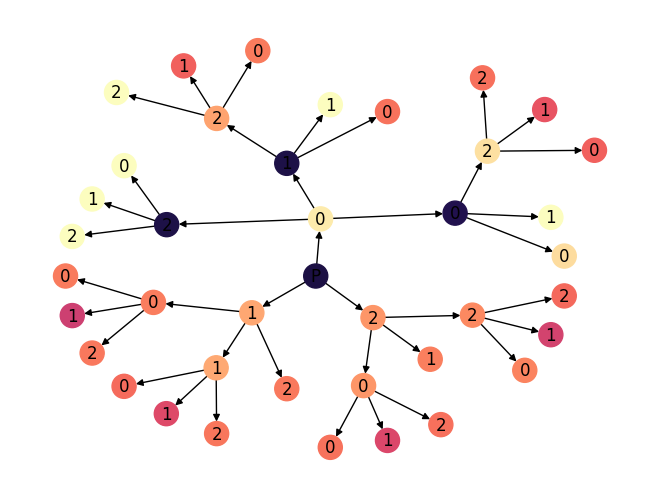

In [57]:
net = ConnNet(cols=3,rows=3) 
env = make("connectx", debug=True, configuration={'rows':net.rows,'columns': net.cols,'inarow':2})
mcts = MCTS(net, env)

for i in range(60):
    mcts.playout()
    
cmap = matplotlib.colormaps['magma']
norm = plt.Normalize(vmin=-1, vmax=1)
G = nx.DiGraph()
colors = list()
node_labels = {mcts._root.ct:'P'}
def add_edges(node, depth):
    
    value = node.get_value().item()
    colors.append(cmap(norm(value)))
    G.add_node(node.ct)
    if depth<=0:
        return
    for key, child in node.children.items():
        G.add_edge(node.ct, child.ct)
        node_labels[child.ct] = key
        add_edges(child,depth-1)
add_edges(mcts._root, depth=5)

pos = graphviz_layout(G, prog="twopi")
nx.draw(G, pos, with_labels=True, node_color=colors, labels=node_labels)
plt.show()

In [129]:
net = ConnNet(cols=5,rows=4)     
tr = Trainer(net, 'points/test4x5')
# X_train, y_train = tr.collect_data(3)
tr.train()
# tr.get_buffer()
pass

KeyboardInterrupt: 

/tmp/ipykernel_16641/2038981296.py:19: DeprecationWarning: nx.nx_pydot.graphviz_layout depends on the pydot package, which hasknown issues and is not actively maintained. Consider usingnx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723
  pos = graphviz_layout(G, prog="twopi")


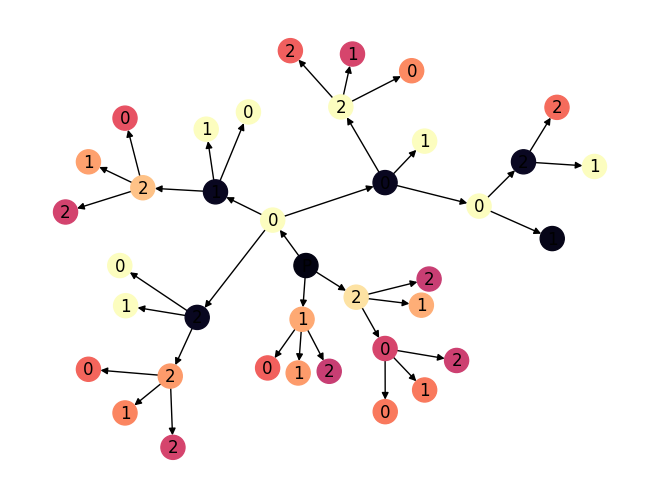

In [1]:
from nets.basic import ConnNet
from train.trainer import Trainer

net = ConnNet(cols=5,rows=4)     

/home/polzovatel/projects/kaggle/connectx/venv/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Loading environment lux_ai_s2 failed: No module named 'vec_noise'


In [8]:
from multiprocessing import Pool
import torch
def f(x):
    return x*x
torch.multiprocessing.spawn(f, args=(1,))

Traceback (most recent call last):
  File "<string>", line 1, in <module>
  File "/usr/local/lib/python3.8/multiprocessing/spawn.py", line 116, in spawn_main
    exitcode = _main(fd, parent_sentinel)
  File "/usr/local/lib/python3.8/multiprocessing/spawn.py", line 126, in _main
    self = reduction.pickle.load(from_parent)
AttributeError: Can't get attribute 'f' on <module '__main__' (built-in)>


ProcessExitedException: process 0 terminated with exit code 1

In [ ]:
tr = Trainer(net, 'points/test4x5')
tr.train()

In [66]:
env = make("connectx", debug=True, configuration={'rows':3,'columns': 3,'inarow':2})

In [86]:
net = ConnNet(cols=3,rows=3) 
policy, value = net(X_train)

In [73]:
board = env.state[0].observation.board

In [87]:
net.get_probs(board)

tensor([0.4075, 0.1625, 0.4300], grad_fn=<SoftmaxBackward0>)
[False False False]


(tensor([0.4075, 0.1625, 0.4300], grad_fn=<IndexPutBackward0>),
 tensor([[0.3377]], grad_fn=<TanhBackward0>))

In [20]:
step = 2
env.step([step,step])
res = env.render(mode="ansi")
print(res)

+---+---+---+
| 0 | 0 | 1 |
+---+---+---+
| 0 | 0 | 2 |
+---+---+---+
| 0 | 0 | 1 |
+---+---+---+



In [6]:
env.reset()
res = env.render(mode="ansi")
print(res)

+---+---+---+
| 0 | 0 | 0 |
+---+---+---+
| 0 | 0 | 0 |
+---+---+---+
| 0 | 0 | 0 |
+---+---+---+



In [16]:
import copy
cpenv = copy.deepcopy(env)

In [19]:
res = cpenv.render(mode="ansi")
print(res)

+---+---+---+
| 0 | 0 | 0 |
+---+---+---+
| 0 | 0 | 0 |
+---+---+---+
| 0 | 0 | 1 |
+---+---+---+



In [8]:
env.copy()

AttributeError: 'Environment' object has no attribute 'copy'

In [ ]:
def plot_tree(node):
    

    

    G.add_node(node.val)
    add_edges(node)



In [144]:
env = make("connectx", debug=True, configuration={'rows':4,'columns': 4})
res = env.render(mode="ansi")
print(res)

+---+---+---+---+
| 0 | 0 | 0 | 0 |
+---+---+---+---+
| 0 | 0 | 0 | 0 |
+---+---+---+---+
| 0 | 0 | 0 | 0 |
+---+---+---+---+
| 0 | 0 | 0 | 0 |
+---+---+---+---+



+---+---+---+---+---+---+---+
| 0 | 0 | 0 | 0 | 0 | 0 | 0 |
+---+---+---+---+---+---+---+
| 0 | 0 | 0 | 0 | 0 | 0 | 0 |
+---+---+---+---+---+---+---+
| 0 | 0 | 0 | 0 | 0 | 0 | 0 |
+---+---+---+---+---+---+---+
| 0 | 0 | 0 | 0 | 0 | 0 | 0 |
+---+---+---+---+---+---+---+
| 0 | 0 | 0 | 0 | 0 | 0 | 0 |
+---+---+---+---+---+---+---+
| 0 | 0 | 0 | 2 | 0 | 0 | 1 |
+---+---+---+---+---+---+---+



In [65]:
# dec = base64.decodebytes(weights)
# unpick = pickle.loads(dec)

# net.load_state_dict(unpick)

In [81]:
exm = [1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 2, 2, 2, 0, 0, 1, 0, 2, 1, 1, 2, 0]

# pol, val = net.forward(exm)
# pol, val
print(net.get_probs(exm))
net.play(exm)

tensor([0.0000, 0.0000, 0.1861, 0.0000, 0.0619, 0.0858, 0.1522],
       grad_fn=<IndexPutBackward0>)


2

In [78]:
rns = list()
sms = 0
sss = 0
for i in range(1,20):
    rn = random.randint(1,13)
    rns.append(rn)
    sms+=(rn-sms)/i
    if i==0:
        i=2
    sss=sss*((i-1)/i)+rn/i
print(sms)
print(sss)
np.mean(rns)

5.421052631578947
5.421052631578947


5.421052631578948

In [64]:
torch.argmax(net.get_probs(exm)).item()

4

In [26]:
net.play(exm)

6

In [47]:
val

tensor([[-0.2251]], grad_fn=<AddmmBackward0>)

In [58]:
inside = 128
res_blocks = [BasicBlock(inside, inside) for i in range(5)]

body = nn.Sequential(*res_blocks)

# body(x)

In [20]:
val

tensor([[-0.3031]], grad_fn=<AddmmBackward0>)

In [19]:
pol

tensor([[ 0.1010, -0.9484, -0.9555,  0.5573,  0.2035,  0.2625,  0.2147]],
       grad_fn=<AddmmBackward0>)

In [24]:
net.play(exm)

6

In [116]:
from submissions.alpha_boss.submission import alpha_boss

In [5]:
net = ConnNet(cols=7,rows=6)

def deep_agent(observation, configuration):
    return net.play(observation.board)


In [6]:
# This agent random chooses a non-empty column.
def my_agent(observation, configuration):
    from random import choice
    return choice([c for c in range(configuration.columns) if observation.board[c] == 0])

In [226]:
env = make("connectx", debug=True, configuration={'rows':3,'columns': 2, 'inarow':2})

In [230]:
env.step([0,0])
res = env.render(mode="ansi")
print(res)

FailedPrecondition: Environment done, reset required.

In [228]:
env.step([1,1])
res = env.render(mode="ansi")
print(res)

+---+---+
| 0 | 0 |
+---+---+
| 0 | 0 |
+---+---+
| 1 | 2 |
+---+---+



In [232]:
env.state

[{'action': 0,
  'reward': 1,
  'info': {},
  'observation': {'remainingOverageTime': 60,
   'step': 3,
   'board': [0, 0, 1, 0, 1, 2],
   'mark': 1},
  'status': 'DONE'},
 {'action': 0,
  'reward': -1,
  'info': {},
  'observation': {'remainingOverageTime': 60, 'mark': 2},
  'status': 'DONE'}]

In [95]:
env.state

[{'action': 0,
  'reward': 0,
  'info': {},
  'observation': {'remainingOverageTime': 60,
   'step': 4,
   'board': [1, 0, 2, 0, 1, 0],
   'mark': 1},
  'status': 'DONE'},
 {'action': 0,
  'reward': None,
  'info': {},
  'observation': {'remainingOverageTime': 60, 'mark': 2},
  'status': 'INVALID'}]

In [16]:
env.reset()
# Play as the first agent against default "random" agent.
env.run([alpha_boss, 'random'])
res = env.render(mode="ansi")
print(res)

+---+---+---+---+---+---+---+
| 0 | 0 | 0 | 0 | 0 | 0 | 0 |
+---+---+---+---+---+---+---+
| 0 | 0 | 0 | 0 | 0 | 0 | 0 |
+---+---+---+---+---+---+---+
| 0 | 0 | 0 | 0 | 0 | 0 | 0 |
+---+---+---+---+---+---+---+
| 0 | 0 | 0 | 0 | 0 | 0 | 0 |
+---+---+---+---+---+---+---+
| 0 | 0 | 1 | 0 | 0 | 0 | 1 |
+---+---+---+---+---+---+---+
| 1 | 0 | 1 | 2 | 2 | 2 | 2 |
+---+---+---+---+---+---+---+



-0.30612244897959184